In [1]:
import keras 

keras.__version__

'2.4.3'

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


In [4]:
# 32,32,3 = 32*32의 칼라(3)이미지 데이터가 5만장
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

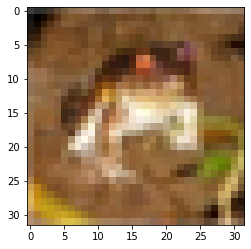

In [5]:
import matplotlib.pyplot as plt

digit = X_train[0]
plt.imshow(digit)
plt.show()

In [9]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [12]:
import numpy as np

np.set_printoptions(linewidth=150)

print((X_train[0][0])

SyntaxError: ignored

In [7]:
print(X_train[0][1])

[[ 16  20  20]
 [  0   0   0]
 [ 18   8   0]
 [ 51  27   8]
 [ 88  51  21]
 [120  82  43]
 [128  89  45]
 [127  86  44]
 [126  87  50]
 [116  79  44]
 [106  70  37]
 [101  67  35]
 [105  70  36]
 [113  74  35]
 [109  70  33]
 [112  72  37]
 [119  79  44]
 [109  71  33]
 [105  69  27]
 [125  89  46]
 [127  92  46]
 [122  85  39]
 [131  89  47]
 [124  82  41]
 [121  79  37]
 [131  89  48]
 [132  91  53]
 [133  94  58]
 [133  96  60]
 [123  88  55]
 [119  83  50]
 [122  87  57]]


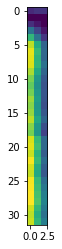

In [8]:
import matplotlib.pyplot as plt

digit = X_train[0][1]
plt.imshow(digit)
plt.show()

In [10]:
X_train = X_train.reshape((50000, 32*32*3))
X_test = X_test.reshape((10000, 32*32*3))

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

In [13]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

print(X_train[0])

[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]


In [14]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [15]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
from keras import models, layers

CIFAR = models.Sequential()
CIFAR.add(layers.Dense(2048, activation='relu', input_shape=(32*32*3,)))
CIFAR.add(layers.Dense(1024, activation='relu'))
CIFAR.add(layers.Dense(512, activation='relu'))
CIFAR.add(layers.Dense(256, activation='relu'))
CIFAR.add(layers.Dense(128, activation='relu'))
CIFAR.add(layers.Dense(10, activation='softmax'))

In [17]:
CIFAR.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 9,081,994
Trainable params: 9,081,994
Non-trainable params: 0
______________________________________________

In [18]:
CIFAR.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

In [19]:
%%time

Hist = CIFAR.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
313/313 [==============================] - 6s 9ms/step - loss: 2.9166 - accuracy: 0.1575 - val_loss: 1.9697 - val_accuracy: 0.2879
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 1.9203 - accuracy: 0.3065 - val_loss: 1.9427 - val_accuracy: 0.3053
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 1.8235 - accuracy: 0.3428 - val_loss: 1.8722 - val_accuracy: 0.3482
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 1.7389 - accuracy: 0.3788 - val_loss: 1.7358 - val_accuracy: 0.3683
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 1.6730 - accuracy: 0.4002 - val_loss: 1.6810 - val_accuracy: 0.3966
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 1.6321 - accuracy: 0.4196 - val_loss: 1.7906 - val_accuracy: 0.3687
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 1.5945 - accuracy: 0.4333 - val_loss: 1.6397 - val_accuracy: 0.4233

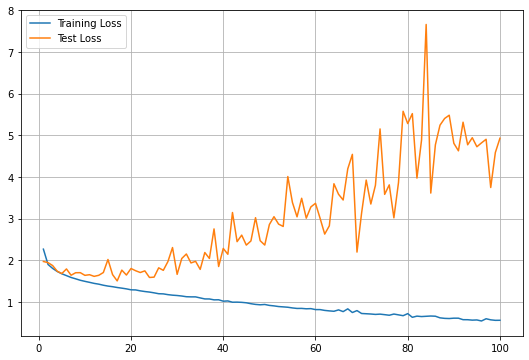

In [20]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss'])+1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()

In [21]:
loss, accuracy = CIFAR.evaluate(X_test, y_test)

loss, accuracy

313/313 [==============================] - 1s 2ms/step - loss: 4.4462 - accuracy: 0.4848


(4.446178436279297, 0.4848000109195709)

In [22]:
np.set_printoptions(suppress=True, precision=9)
print(CIFAR.predict(X_test[:1, :]))

[[0.          0.          0.000009504 0.99966     0.000001129 0.000011316 0.000317977 0.          0.          0.         ]]


In [23]:
print(CIFAR.predict_classes(X_test[:1, :]))

[3]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
